# Further Hypothesis Testing

In [1]:
# Select this cell and type Ctrl-Enter to execute the code below.

library(tidyverse)

set_plot_dimensions <- function(width_choice, height_choice) {
    options(repr.plot.width = width_choice, repr.plot.height = height_choice)
}

cbPal <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#CC79A7", "#0072B2", "#D55E00")

set_plot_dimensions(5, 4)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# You should see "Attaching packages" and some ticks by the packages loaded.
# The "Conflicts" aren't a problem.

# Other problems loading the library? Try running this cell.

install.packages("tidyverse")

library(tidyverse)


## 4 - Comparing means of more than two groups

In [2]:
# Run this cell to load the data.

data <- read_csv("../assets/stars.csv")

type_key <- c("Brown Dwarf", "Red Dwarf", "White Dwarf", "Main Sequence", "Supergiant", "Hypergiant")
spectral_classes <- c("O", "B", "A", "F", "G", "K", "M")

data$type <- factor(data$type)
data$spectral_class <- factor(data$spectral_class, levels = spectral_classes)


Rows: 240 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): spectral_class
dbl (4): temperature, luminosity, radius, type

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


During the course of your investigations for Dr Howe, you have noticed that the distributions of the dwarf stars' luminosities (types 0,1 and 2) are also overlapping.

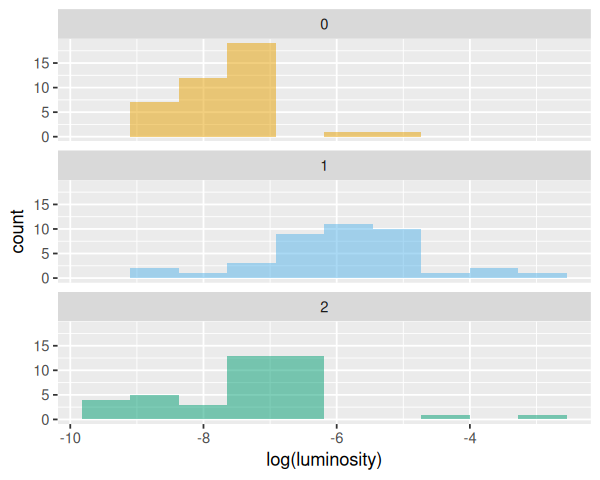

In [3]:
data %>%
    filter(type %in% c(0, 1, 2)) %>%
    ggplot(aes(x = log(luminosity), fill = type)) +
    scale_fill_manual(values = cbPal[c(1, 2, 3)]) +
    geom_histogram(alpha = 0.5, bins = 10) +
    guides(fill = "none") +
    facet_wrap(~type, ncol = 1)


### Question: do types 0, 1 and 2 have the same mean luminosity?

The t-test can only compare the means of two samples (or one sample with a theoretical mean). 

To move beyond two samples, we need to use a different method called [*analysis of variance*](https://en.wikipedia.org/wiki/Analysis_of_variance) (ANOVA).

### One-way ANOVA

#### Theory

$H_0$: All of the groups have identical means:  $\mu = \mu_1 = \mu_2 = \mu_3$.

$H_1$: Not all of the group means are identical.

The one-way (also known as single-factor) ANOVA uses the F-test to compare the within-group and between-group variation:

$$F = \frac{\text{between-group variation}}{\text{within-group variation}}$$

Under $H_0$, $F$ follows an F-distribution with parameters $(g-1,n_T-g)$, where $g$ is the number of groups (here, 3 types of star), and $n_T$ is the total number of observations.

Once again, the F-distribution provides a p-value associated with the calculated value of $F$.

- The T-test is used to test the hypothesis whether the given mean is significantly different from the sample mean or not
- F-test is used to compare the two standard deviations of two samples and check the variability. An F-test is a ratio of two Chi-squares.

#### Assumptions

- Observations are independent.
- Populations are normally distributed.
- Variances of the populations are equal.



#### Application

We will set $\alpha=0.05$.

In [4]:
data %>%
    filter(type %in% c(0, 1, 2)) %>%
    aov(log(luminosity) ~ type, .) %>%
    summary()


             Df Sum Sq Mean Sq F value   Pr(>F)    
type          2  70.54   35.27   29.53 4.14e-11 ***
Residuals   117 139.74    1.19                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Here we have $p<\alpha$, so we reject $H_0$: the three groups do not appear to have the same mean luminosity.

### Other types of ANOVA

ANOVA is an important element of statistical analysis when we are interested in comparing the effects of different treatments. 

The underlying statistical model changes, depending on the expected relationship between treatment and effect (*fixed-*, *random-* or *mixed-effects*).

Where multiple variables change simultaneously (for example, in patient populations), we may need to consider *multiple factors* (e.g. *two-way ANOVA*) and the *interactions* between factors.

<br>

---